# 1.1 Import Data and Required Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling imports

In [6]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

# Load data

In [8]:
df= pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Prepare X and y


In [11]:
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']

# Print unique categories

In [13]:
print("Categories in 'gender':", df['gender'].unique())
print("Categories in 'race/ethnicity':", df['race/ethnicity'].unique())
print("Categories in 'parental_level_of_education':", df['parental_level_of_education'].unique())
print("Categories in 'lunch':", df['lunch'].unique())
print("Categories in 'test_preparation_course':", df['test_preparation_course'].unique())

Categories in 'gender': ['female' 'male']
Categories in 'race/ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch': ['standard' 'free/reduced']
Categories in 'test_preparation_course': ['none' 'completed']


# Column transformations

In [15]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
])

X = preprocessor.fit_transform(X)


# Train-test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model evaluation function


In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

# Model training


In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}


In [20]:
model_list = []
r2_list = []

In [21]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    print(f"{name}")
    print("Model performance for Training set")
    print(f"- RMSE: {train_rmse:.4f}")
    print(f"- MAE: {train_mae:.4f}")
    print(f"- R2 Score: {train_r2:.4f}")
    print("Model performance for Test set")
    print(f"- RMSE: {test_rmse:.4f}")
    print(f"- MAE: {test_mae:.4f}")
    print(f"- R2 Score: {test_r2:.4f}")
    print("="*35)

    model_list.append(name)
    r2_list.append(test_r2)

Linear Regression
Model performance for Training set
- RMSE: 5.3244
- MAE: 4.2671
- R2 Score: 0.8743
Model performance for Test set
- RMSE: 5.3960
- MAE: 4.2158
- R2 Score: 0.8803
Lasso
Model performance for Training set
- RMSE: 6.5938
- MAE: 5.2063
- R2 Score: 0.8071
Model performance for Test set
- RMSE: 6.5197
- MAE: 5.1579
- R2 Score: 0.8253
Ridge
Model performance for Training set
- RMSE: 5.3233
- MAE: 4.2650
- R2 Score: 0.8743
Model performance for Test set
- RMSE: 5.3904
- MAE: 4.2111
- R2 Score: 0.8806
K-Neighbors Regressor
Model performance for Training set
- RMSE: 5.7077
- MAE: 4.5167
- R2 Score: 0.8555
Model performance for Test set
- RMSE: 7.2530
- MAE: 5.6210
- R2 Score: 0.7838
Decision Tree
Model performance for Training set
- RMSE: 0.2795
- MAE: 0.0187
- R2 Score: 0.9997
Model performance for Test set
- RMSE: 8.3159
- MAE: 6.5750
- R2 Score: 0.7158
Random Forest Regressor
Model performance for Training set
- RMSE: 2.2657
- MAE: 1.8135
- R2 Score: 0.9772
Model performance

# Final results

In [22]:
results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])
print(results.sort_values(by='R2_Score', ascending=False))


                Model Name  R2_Score
2                    Ridge  0.880593
0        Linear Regression  0.880345
7    CatBoosting Regressor  0.851632
5  Random Forest Regressor  0.850818
8       AdaBoost Regressor  0.842835
6             XGBRegressor  0.827797
1                    Lasso  0.825320
3    K-Neighbors Regressor  0.783813
4            Decision Tree  0.715807


# Final model



In [23]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
print("Accuracy of the model is %.2f" % (r2_score(y_test, y_pred) * 100))

Accuracy of the model is 88.03


# Plot prediction


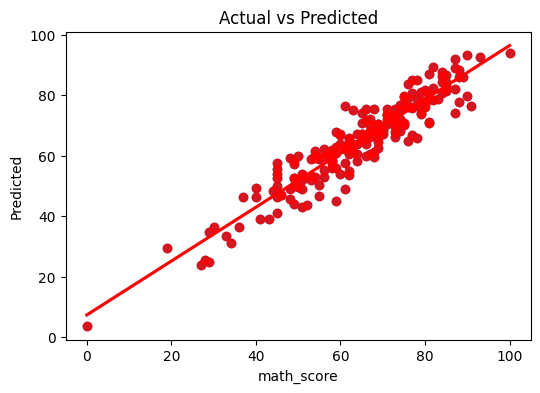

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.title("Actual vs Predicted")
plt.show()

# Prediction differences


In [26]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_df.head()

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
